## importing Necessary Libraries

In [5]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
import pandas as pd
# import torch
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# from torchvision import transforms
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

## visualizaing the images in folder

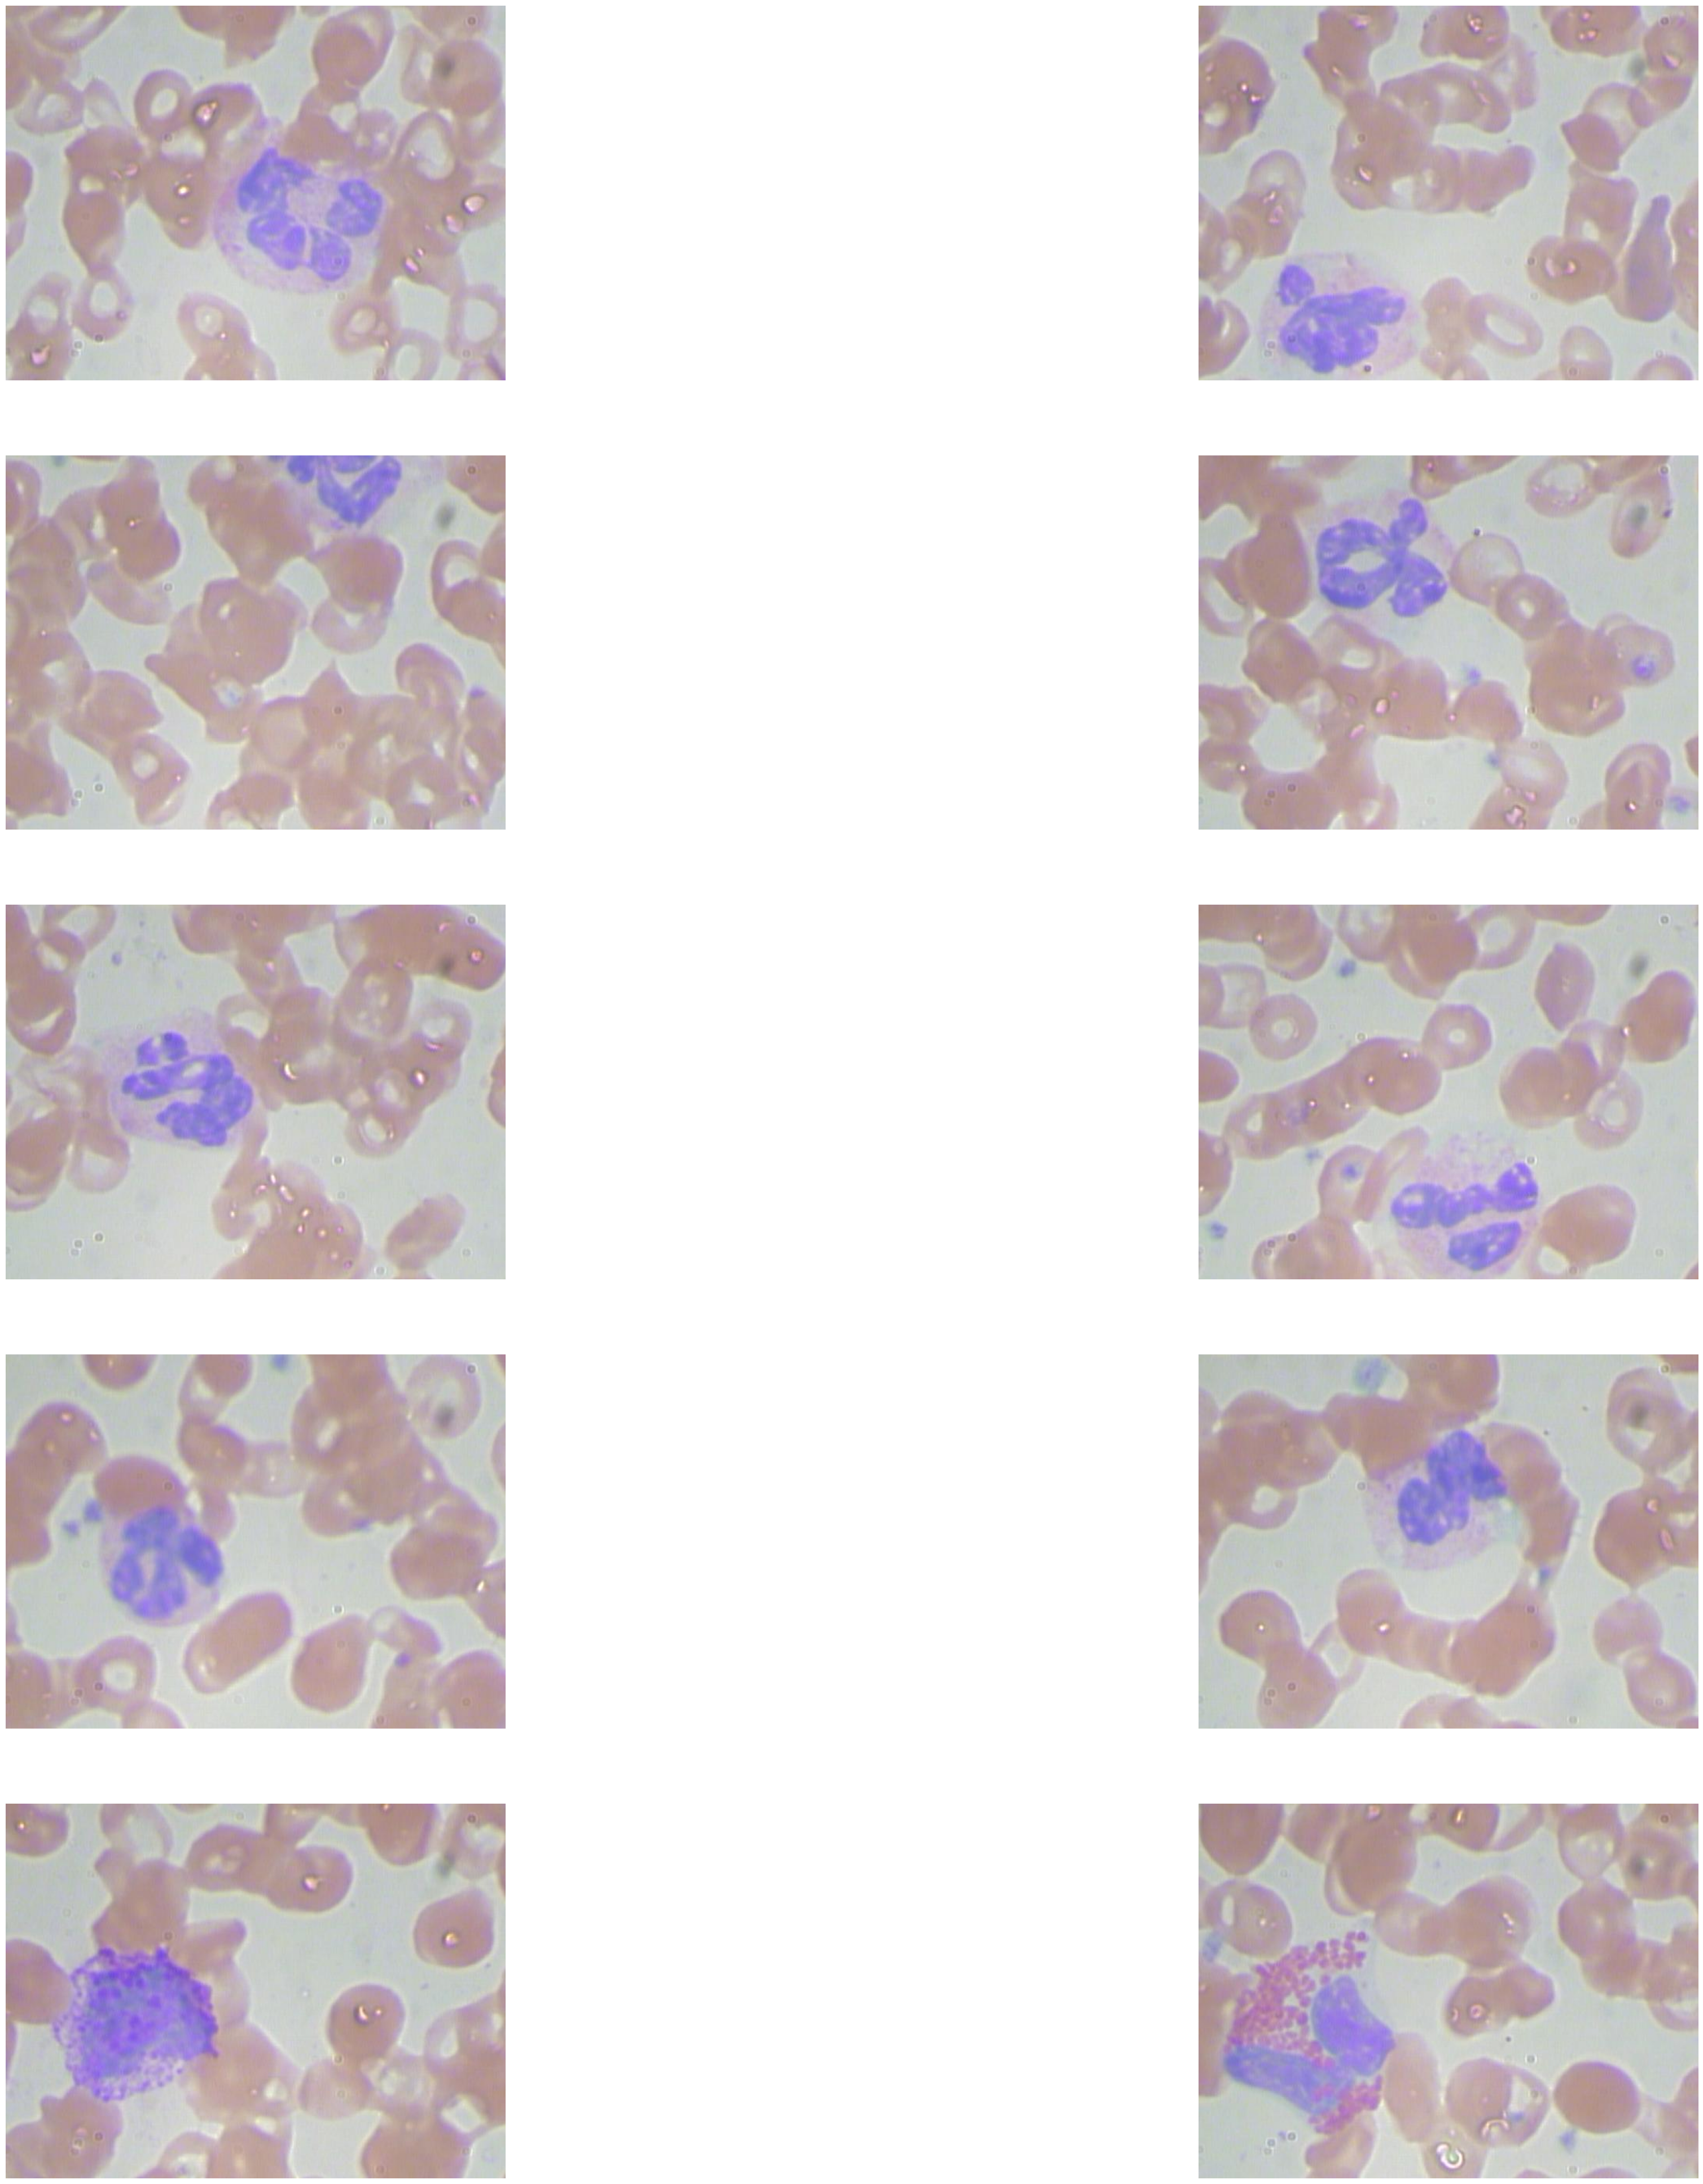

In [6]:
def visualize_images(input_folder):
    num_images = 10
    fig = plt.figure(figsize=(50, 50))
    columns =2
    rows = num_images // columns
    for i, filename in enumerate(os.listdir(input_folder)[:num_images]):
        img = Image.open(os.path.join(input_folder, filename))
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
visualize_images('./data/original/JPEGImages/')

## checking the histogram for each channel for one image

In [2]:
import matplotlib


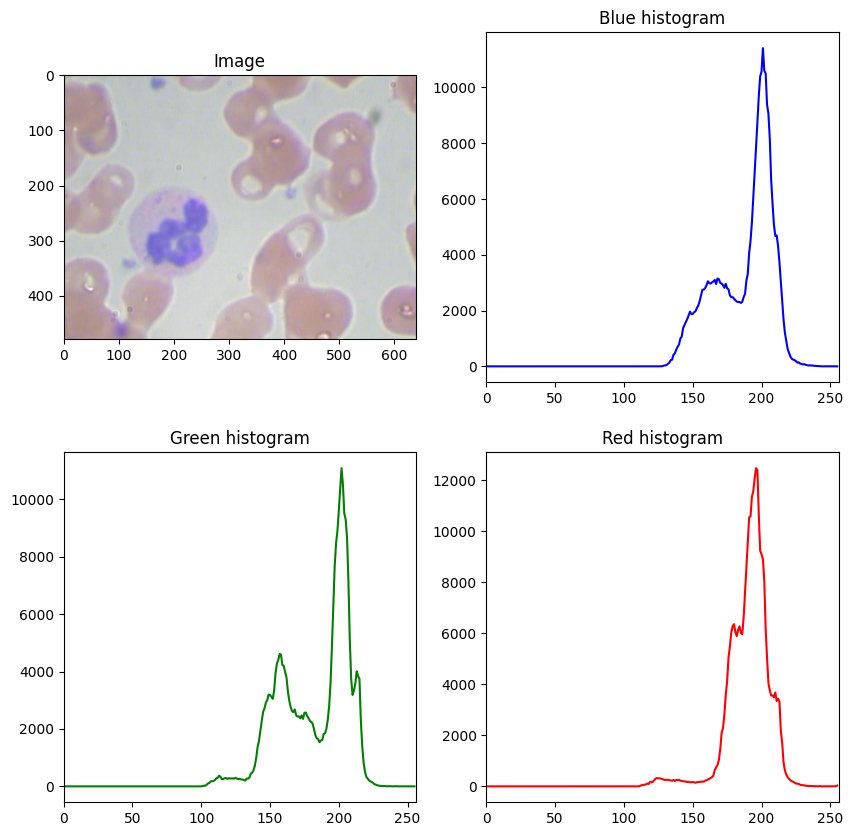

In [7]:
#helps understanding the overexposed and underexposed regions of image
# load image
img = cv2.imread('./data/original/JPEGImages/BloodImage_00022.jpg')

# calculate histograms
b_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([img], [1], None, [256], [0, 256])
r_hist = cv2.calcHist([img], [2], None, [256], [0, 256])

# plot histograms
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Image')
plt.subplot(222), plt.plot(b_hist, color='b'), plt.xlim([0, 256]), plt.title('Blue histogram')
plt.subplot(223), plt.plot(g_hist, color='g'), plt.xlim([0, 256]), plt.title('Green histogram')
plt.subplot(224), plt.plot(r_hist, color='r'), plt.xlim([0, 256]), plt.title('Red histogram')
plt.show()

## Get and print overall Image sizes and their mean

In [9]:
def get_image_sizes(input_folder):
    sizes = []
    for filename in os.listdir(input_folder):
        img = Image.open(os.path.join(input_folder, filename))
        sizes.append(img.size)
    sizes = np.array(sizes)
    print(f"Minimum image size: {sizes.min(axis=0)}")
    print(f"Maximum image size: {sizes.max(axis=0)}")
    print(f"Mean image size: {sizes.mean(axis=0)}")
get_image_sizes('./data/original/JPEGImages/')

Minimum image size: [640 480]
Maximum image size: [640 480]
Mean image size: [640. 480.]


## Histogram of Pixel Intensities

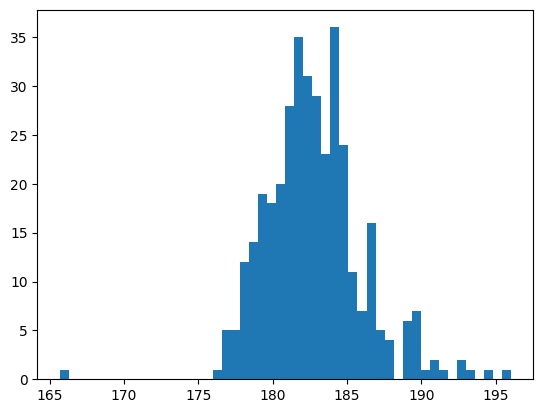

In [10]:
def plot_pixel_intensities(input_folder):
    intensities = []
    for filename in os.listdir(input_folder):
        img = Image.open(os.path.join(input_folder, filename))
        intensities.append(np.array(img).mean())
    plt.hist(intensities, bins=50)
    plt.show()
    
plot_pixel_intensities('./data/original/JPEGImages/') 

## checking no of channels for images and plotting their distirbution

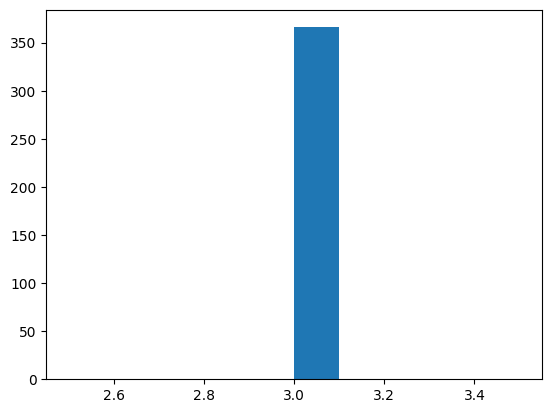

In [11]:
def check_color_channels(input_folder):
    num_channels = []
    for filename in os.listdir(input_folder):
        img = Image.open(os.path.join(input_folder, filename))
        num_channels.append(len(np.array(img).shape))
    plt.hist(num_channels)
    plt.show()
check_color_channels('./data/original/JPEGImages/') 

## image aspect ratio Distribution

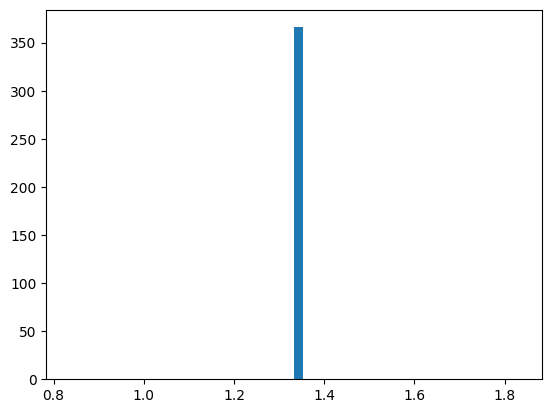

In [12]:
def check_image_aspect_ratios(input_folder):
    aspect_ratios = []
    for filename in os.listdir(input_folder):
        img = Image.open(os.path.join(input_folder, filename))
        aspect_ratio = img.size[0] / img.size[1]
        aspect_ratios.append(aspect_ratio)
    plt.hist(aspect_ratios, bins=50)
    plt.show()
check_image_aspect_ratios('./data/original/JPEGImages/') 

# checking the class statistics

In [13]:
labels = pd.read_csv("./data/original/labels.csv", usecols = ['Image','Category'],index_col=False)
labels 

Image    Category
0        0  NEUTROPHIL
1        1  NEUTROPHIL
2        2  NEUTROPHIL
3        3  NEUTROPHIL
4        4  NEUTROPHIL
..     ...         ...
406    406         NaN
407    407  NEUTROPHIL
408    408  NEUTROPHIL
409    409  NEUTROPHIL
410    410  EOSINOPHIL

[411 rows x 2 columns]

In [14]:
labels2 = labels.groupby(['Category'])['Category'].count()
labels2

Category
BASOPHIL        3
EOSINOPHIL     91
LYMPHOCYTE     34
MONOCYTE       22
NEUTROPHIL    217
Name: Category, dtype: int64

Text(0,0.5,'Counts')

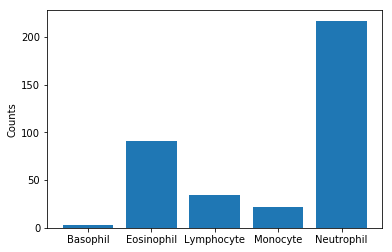

In [10]:
counts = labels2.values
fig, ax = plt.subplots()
plt.bar(list(range(5)), counts)
ax.set_xticklabels(('', 'Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))
ax.set_ylabel('Counts')

# plotting sample images for each class

In [11]:
def plotImage(image_location):
    image = cv2.imread(image_location)
    plt.imshow(image)
    return

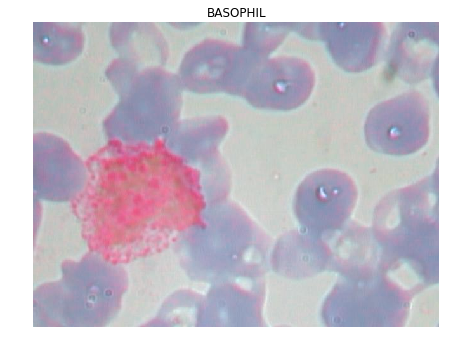

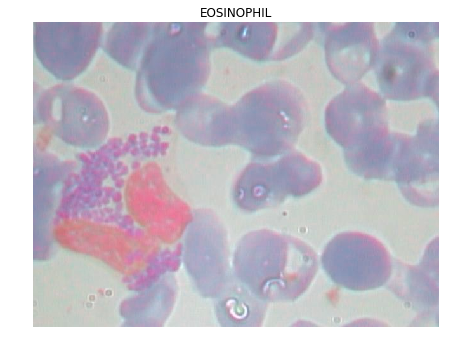

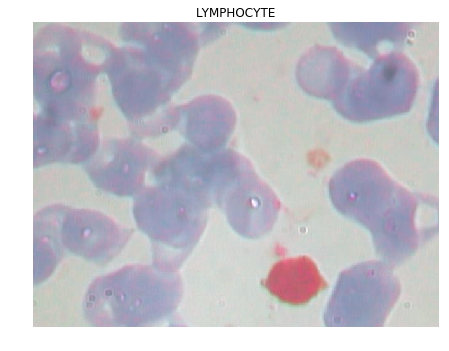

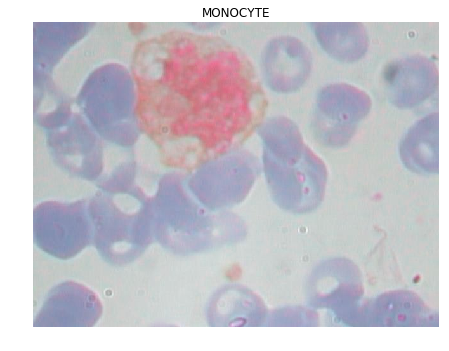

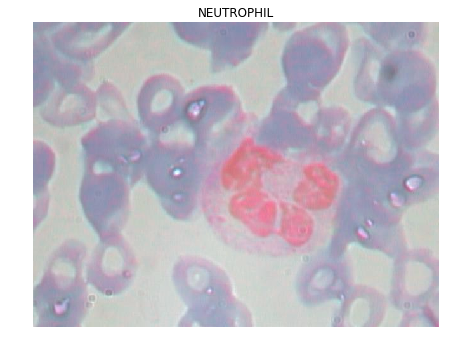

In [12]:
images_folder = "./data/original/JPEGImages/" 
classes= labels2.keys().tolist()
for cls in classes:
    out = labels[labels['Category'] == cls]['Image'].values[0]
    str_num = str(out).zfill(5)
    image_path = images_folder + "BloodImage_"+str(str_num)+'.jpg'
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title(cls)
    plt.axis('off') 
    plotImage(image_path)


In [13]:
labels2.keys().tolist()

['BASOPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

## Reading the XML file available in dataset and plotting it

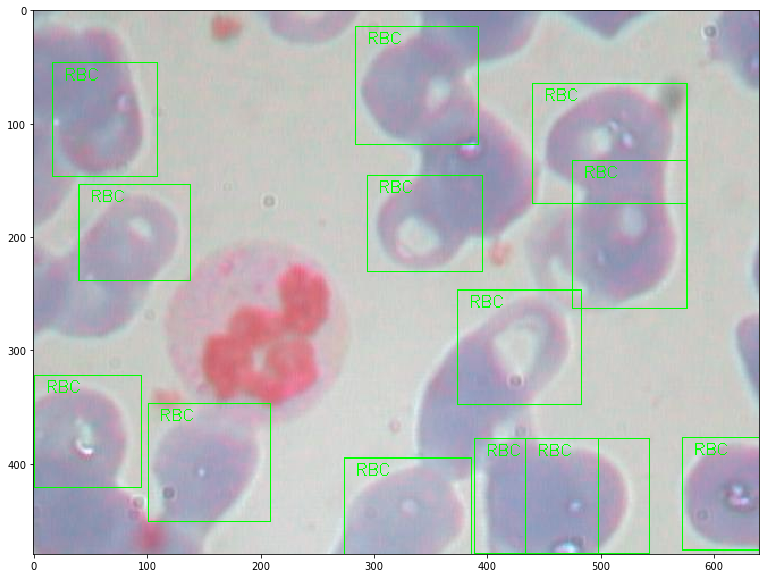

In [14]:
# Note that the function below is adapted from https://github.com/Shenggan/BCCD_Dataset
image = cv2.imread("./data/original/JPEGImages/BloodImage_00022.jpg")
tree = ET.parse("./data/original/Annotations/BloodImage_00022.xml")
for elem in tree.iter():
    if 'object' in elem.tag or 'part' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))
                if name[0] == "R":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 255, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 255, 0), 1)
                if name[0] == "W":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (0, 0, 255), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (0, 0, 255), 1)
                if name[0] == "P":
                    cv2.rectangle(image, (xmin, ymin),
                                (xmax, ymax), (255, 0, 0), 1)
                    cv2.putText(image, name, (xmin + 10, ymin + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 1e-3 * image.shape[0], (255, 0, 0), 1)
plt.figure(figsize=(13,13))
plt.imshow(image)
plt.show()

## copying the images of each class to separate folder

In [104]:
images_folder = "./data/original/JPEGImages/" 
destination_dir = "./data/original/seg_images/"
os.makedirs(destination_dir,exist_ok=True) #create the new folder everytime

classes= labels2.keys().tolist()
for cls in classes:
    class_folder_path = destination_dir+'/'+str(cls)
    os.makedirs(class_folder_path,exist_ok=True) 
    
    out = labels[labels['Category'] == cls]['Image'].values.tolist()
    for img_no in out:
        str_num = str(img_no).zfill(5)
        image_path = images_folder + "BloodImage_"+str(str_num)+'.jpg'
        destination_path = class_folder_path + "/BloodImage_"+str(str_num)+'.jpg'
        try:
            shutil.copyfile(image_path, destination_path)
        except Exception as e:
            print(e)


[Errno 2] No such file or directory: './data/original/JPEGImages/BloodImage_00116.jpg'
[Errno 2] No such file or directory: './data/original/JPEGImages/BloodImage_00280.jpg'


## applying Augmentation on Images